# 🧠 Customer Churn Prediction

## 📌 Project Overview

This project aims to predict whether a customer will churn (i.e., leave the service) based on their behavior, service usage, and demographic information. Customer churn prediction helps businesses take proactive actions to retain customers and reduce revenue loss.

We use a classification model trained on labeled historical data to detect churn patterns and evaluate performance using real-world metrics like accuracy, recall, and precision.

---

## 📁 Dataset Information

The dataset is divided into two files:

- `customer_churn_train.csv`: Used for training and validating the model.
- `customer_churn_test.csv`: Used for testing the model on unseen data.

Both datasets contain the same features (columns).

---

## 📊 Columns Description

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `customerID`        | Unique identifier for each customer.                                        |
| `gender`            | Customer gender: Male or Female.                                            |
| `SeniorCitizen`     | Whether the customer is a senior citizen (1 = Yes, 0 = No).                 |
| `Partner`           | Whether the customer has a partner (Yes or No).                             |
| `Dependents`        | Whether the customer has dependents (Yes or No).                            |
| `tenure`            | Number of months the customer has stayed with the company.                  |
| `PhoneService`      | Whether the customer has phone service (Yes or No).                         |
| `MultipleLines`     | Whether the customer has multiple lines (Yes, No, No phone service).        |
| `InternetService`   | Type of internet service: DSL, Fiber optic, or No.                          |
| `OnlineSecurity`    | Whether the customer has online security (Yes, No, No internet service).    |
| `OnlineBackup`      | Whether the customer has online backup.                                     |
| `DeviceProtection`  | Whether the customer has device protection.                                 |
| `TechSupport`       | Whether the customer has tech support.                                      |
| `StreamingTV`       | Whether the customer has streaming TV.                                      |
| `StreamingMovies`   | Whether the customer has streaming movies.                                  |
| `Contract`          | Type of contract: Month-to-month, One year, Two year.                       |
| `PaperlessBilling`  | Whether the customer uses paperless billing.                                |
| `PaymentMethod`     | Customer’s payment method (Credit card, Bank transfer, etc.).               |
| `MonthlyCharges`    | The amount charged to the customer monthly.                                 |
| `TotalCharges`      | Total amount charged to the customer.                                       |
| `Churn`             | Target variable: whether the customer churned (Yes or No).                  |

---

## 🧪 Project Goals

- Clean and preprocess the data.
- Handle missing values and categorical variables.
- Explore and visualize churn patterns.
- Train multiple classification models.
- Evaluate and compare model performance using metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score
- Choose the best model for deployment.
----
## 🚀 Final Output

- Trained classification model to predict churn.
- Performance evaluation on test data.
- Streamlined project structure with full documentation.


# Load Training and Testing Data

We load both the training and testing datasets in this step.  
These will be used respectively to train and evaluate our classification model.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('D:\customer_churn_prediction\customer_churn_dataset-training-master.csv')
test_data = pd.read_csv('D:\customer_churn_prediction\customer_churn_dataset-testing-master.csv')
df = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [23]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Data Cleaning

Cleaning steps:
- Drop missing rows (only 1 row was incomplete).
- Remove `CustomerID` since it's just an identifier and not a useful feature.
- Reset index after dropping.

This ensures our data is clean and ready for analysis.


In [24]:
df = df.dropna()

df = df.drop(columns=['CustomerID'])

df.reset_index(drop=True, inplace=True)


## Feature Categorization

We separate features into:
- Categorical (object types): to be encoded later
- Numerical: for distribution analysis and scaling

This helps structure EDA and preprocessing steps correctly.


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

print("📁 Categorical Columns:", categorical_cols)
print("🔢 Numerical Columns:", numerical_cols)


## Relationship Between Numerical Features and Churn

In this step, we analyze how each numerical feature relates to customer churn. We use boxplots to compare the distribution of each feature between churned (Churn = 1) and retained customers (Churn = 0).

###  Goal:
To identify features that show a significant difference between the two groups, which may indicate their predictive power in churn modeling.


C:\Users\RAWAN\AppData\Local\Temp\ipykernel_19396\3584896181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df, palette='Set2')


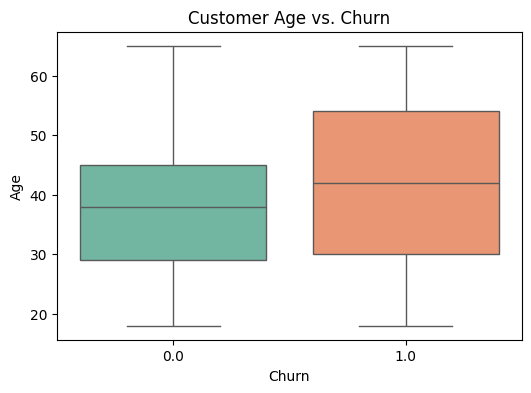

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Age', data=df, palette='Set2')
plt.title("Customer Age vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Age")
plt.show()


### Column Analysis: Age

- Based on the boxplot analysis between Age and Churn, we observed that:

  - Customers who **churned** (`Churn = 1`) tend to be **older** than those who stayed.
  - This may suggest that older customers are:
    - Less engaged with the service.
    - Possibly less satisfied with the offering.
    - Or more likely to cancel due to changing preferences.

**Conclusion:** Age appears to be an important factor, with older customers showing a higher tendency to churn.


C:\Users\RAWAN\AppData\Local\Temp\ipykernel_19396\766213019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')


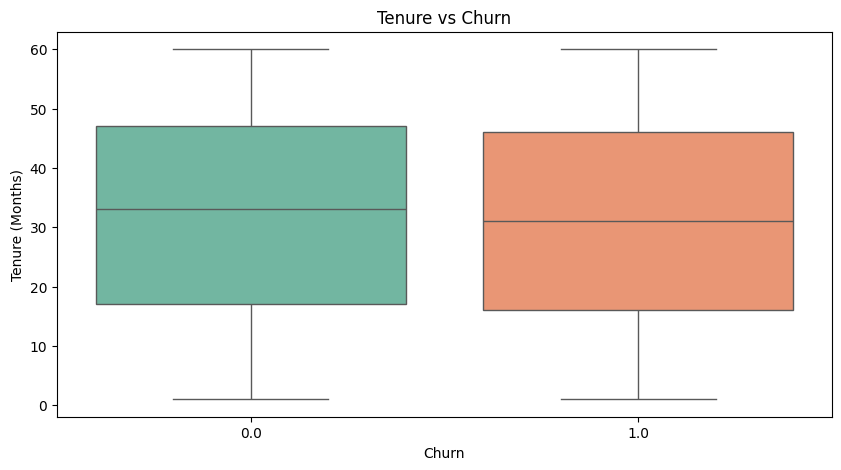

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

### Column Analysis: Tenure
The boxplot shows that the tenure (i.e., how long a customer has been subscribed) is relatively similar for both churned and non-churned customers.
There is no significant difference between the two groups, which indicates that tenure alone may not be a strong predictor of customer churn.



C:\Users\RAWAN\AppData\Local\Temp\ipykernel_19396\1992466238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Usage Frequency', data=df, palette='Set2')


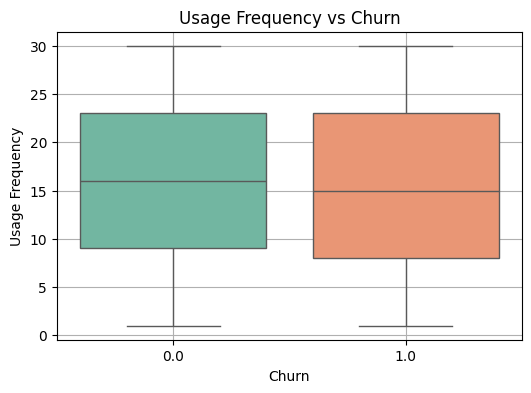

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Usage Frequency', data=df, palette='Set2')
plt.title('Usage Frequency vs Churn')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.grid(True)
plt.show()


### Column Analysis:Usage Frequency 
The boxplot shows a slightly higher median Usage Frequency among customers who churned (Churn = 1) compared to those who did not churn (Churn = 0). However, the difference is small, indicating that usage frequency alone may not be a strong predictor of churn.



C:\Users\RAWAN\AppData\Local\Temp\ipykernel_19396\3561685901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Support Calls', data=df, palette='Set2')


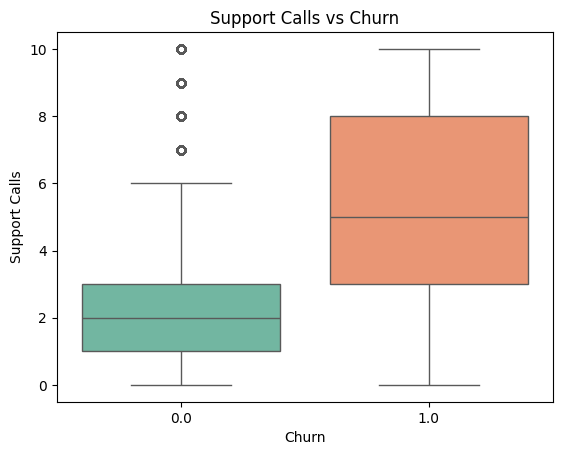

In [28]:
sns.boxplot(x='Churn', y='Support Calls', data=df, palette='Set2')
plt.title('Support Calls vs Churn')
plt.show()


### Column Analysis: support calls

Customers who churned (Churn = 1) tend to have a higher number of support calls.

The median support calls for churned users is around 5, compared to around 1 for non-churned users.

This indicates that frequent issues or dissatisfaction (reflected by support calls) could be a major driver of churn.

Insight: High support call frequency might be a warning sign. This feature could be a strong predictor for churn.

C:\Users\RAWAN\AppData\Local\Temp\ipykernel_19396\178321543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Payment Delay', data=df, palette='Set2')


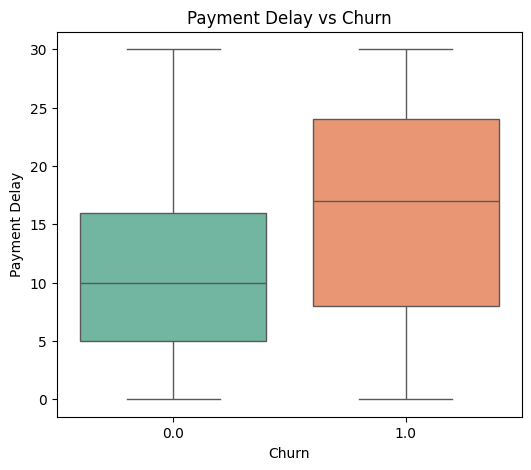

In [29]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='Payment Delay', data=df, palette='Set2')
plt.title('Payment Delay vs Churn')
plt.show()


### Column Analysis: Payment Delay

Customers who churned (Churn = 1) tend to have higher payment delays.

The median delay for churned customers is around 15 days, compared to 10 days for retained customers.
#### Interpretation:
Higher delays in payment could indicate dissatisfaction or financial difficulties, which may lead to customer churn.



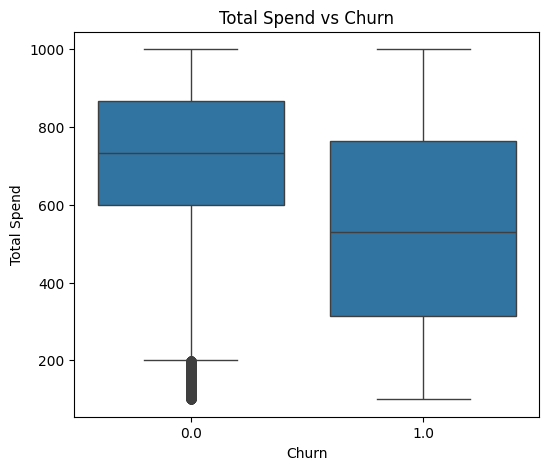

In [30]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df , x='Churn', y='Total Spend')
plt.title('Total Spend vs Churn')
plt.show()


### Column Analysis:Total Spend
Customers who did not churn (0) tend to have a higher total spend compared to those who churned (1).

The median spend of non-churned customers is around 750–800.

For churned customers, the median spend drops to around 500–550.

The spread of spending for churned customers is much wider, indicating variability in behavior.

#### Insight: Lower total spending is associated with a higher likelihood of churn. This could mean that customers who are less financially invested in the service are more likely to leave.

C:\Users\RAWAN\AppData\Local\Temp\ipykernel_19396\659999045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Last Interaction', data=df, palette='Set2')


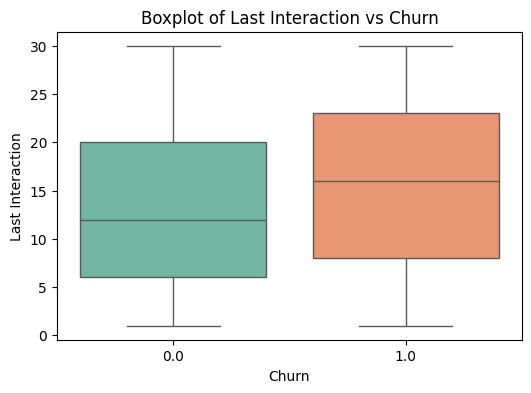

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Last Interaction', data=df, palette='Set2')
plt.title('Boxplot of Last Interaction vs Churn')
plt.xlabel('Churn')
plt.ylabel('Last Interaction')
plt.show()


##  Analysis of 'Last Interaction' Column vs Churn

###  Observations:
- Customers who **churned** (`Churn = 1`) had their last interaction typically between **10 and 25 days ago**.
- Customers who **did not churn** (`Churn = 0`) had more recent interactions, usually between **5 and 20 days**.
- **Conclusion:** Longer periods since last interaction may indicate a higher likelihood of customer churn.

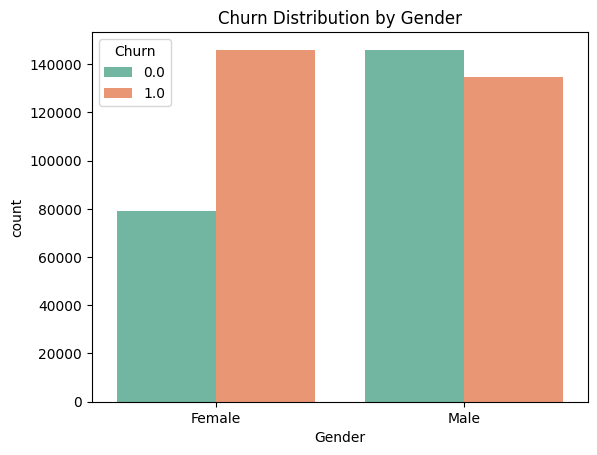

In [32]:
sns.countplot(x='Gender', hue='Churn', data=df, palette='Set2')
plt.title('Churn Distribution by Gender')
plt.show()

### Column Analysis: Gender
From the visualization, we observe that males and females churn at nearly the same rate, indicating no significant difference in churn behavior based on gender.
However, there are almost twice as many male customers as female customers, suggesting a gender imbalance in the customer base.

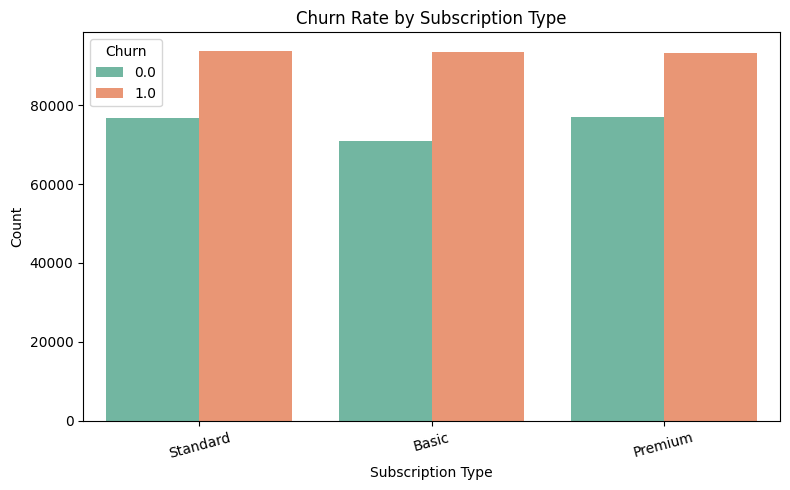

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Subscription Type', hue='Churn', palette='Set2')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Column Analysis: subscription type
We analyzed the relationship between Subscription Type and Customer Churn using a count plot. The observations are:

Among customers who left (Churn = 1), the distribution across subscription types (Basic, Standard, Premium) is roughly equal.

However, among customers who did not leave (Churn = 0), those with a Basic subscription were slightly fewer than those with Standard or Premium subscriptions.

This suggests that customers with a Basic plan may be slightly more likely to churn, but the difference is not significant. Overall, Subscription Type has a weak effect on churn in this dataset.



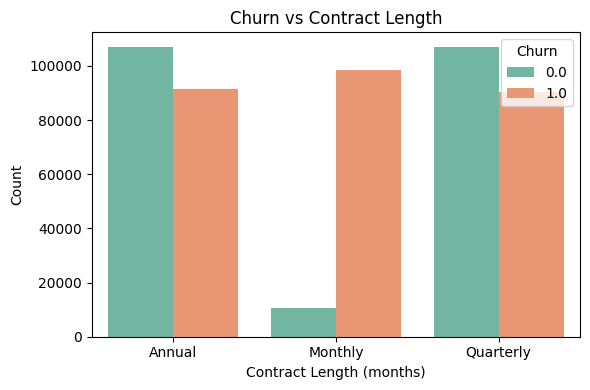

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract Length', hue='Churn', palette='Set2')
plt.title('Churn vs Contract Length')
plt.xlabel('Contract Length (months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### Column Analysis: contract length
Customers with shorter contracts (e.g., 1 month) are more likely to churn compared to those with longer contracts.

The churn rate decreases as the contract length increases.

This suggests that long-term commitment helps retain customers.



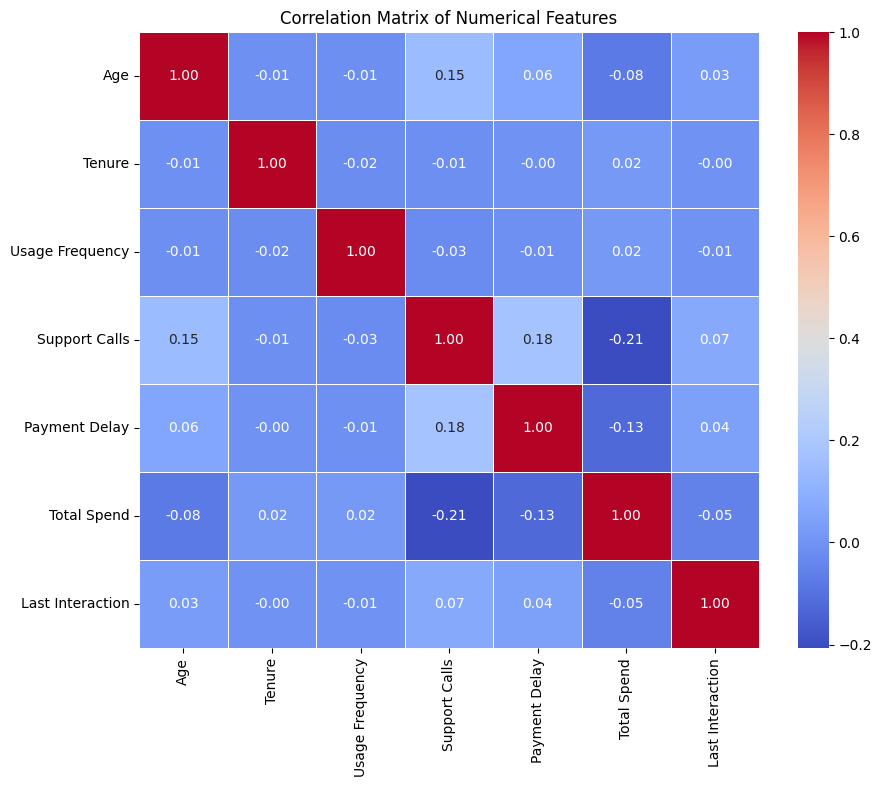

In [35]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The correlation matrix shows that all numerical features have weak correlations with each other.
No pair of features has a strong enough relationship (e.g., > 0.8 or < -0.8) to suggest redundancy.
Therefore, all features will be retained for the modeling phase, as each might bring unique value.



 Data Preprocessing: Scaling & Encoding
1. Feature Scaling using MinMaxScaler
To ensure that all numerical features contribute equally to the machine learning model, we applied Min-Max Scaling, which scales each feature to a range between 0 and 1.
2. Since machine learning models work with numerical values, we needed to convert categorical variables into a numerical format.

In [36]:
from sklearn.preprocessing import LabelEncoder
import joblib

data_encoded = df

gender_encoder = LabelEncoder()
contract_encoder = LabelEncoder()

data_encoded['Gender'] = gender_encoder.fit_transform(data_encoded['Gender'])
data_encoded['Contract Length'] = contract_encoder.fit_transform(data_encoded['Contract Length'])

data_encoded = pd.get_dummies(data_encoded, columns=['Subscription Type'], drop_first=True)

joblib.dump(gender_encoder, "gender_encoder.pkl")
joblib.dump(contract_encoder, "contract_encoder.pkl")
joblib.dump(df.columns.tolist(), "feature_columns.pkl")




['feature_columns.pkl']

In [37]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = data_encoded

scaler = MinMaxScaler()

df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df_scaled.head()


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard
0,0.255319,0,0.644068,0.448276,0.5,0.600000,0,0.924444,0.551724,1.0,False,True
1,1.000000,0,0.813559,0.000000,1.0,0.266667,1,0.507778,0.172414,1.0,False,False
2,0.787234,0,0.220339,0.103448,0.6,0.600000,2,0.094444,0.068966,1.0,False,False
3,0.851064,1,0.627119,0.689655,0.7,0.233333,1,0.328889,0.965517,1.0,False,True
4,0.106383,1,0.525424,0.655172,0.5,0.266667,1,0.574444,0.655172,1.0,False,False


##  Ensemble Learning - Voting Classifier

### why?
Ensemble models combine multiple algorithms to improve performance and reduce overfitting. Here, we use a `VotingClassifier` that blends Logistic Regression, Random Forest, and Gradient Boosting.

###  Why Voting Classifier?
- Combines strengths of different classifiers.
- Soft voting averages class probabilities for better stability.
- Works well for imbalanced or complex datasets like churn prediction.

---

### Models Used:
- `LogisticRegression`: Linear baseline classifier.
- `RandomForestClassifier`: Tree-based ensemble with low variance.
- `GradientBoostingClassifier`: Boosting method that reduces bias.

In [41]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop("Churn", axis=1)
y = df_scaled["Churn"]
joblib.dump(df_scaled, "scaler.pkl")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000)


rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Gradient Boosting', gb_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft' 
)
ensemble_model.fit(X_train, y_train)



VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000))],
                 voting='soft')

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Logistic Regression": lr_model,
    "Voting Ensemble": ensemble_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"

    accuracy = accuracy_score(y_test, y_pred)

    print(f"📌 Model: {name}")
    print(f"🎯 Accuracy: {accuracy}")
    print(f"🔵 ROC AUC Score: {roc_auc}")
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 60)


📌 Model: Random Forest
🎯 Accuracy: 0.9343342372478771
🔵 ROC AUC Score: 0.9521402084682804
📄 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     44981
         1.0       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042

📌 Model: Gradient Boosting
🎯 Accuracy: 0.9107103976564201
🔵 ROC AUC Score: 0.9491132746458752
📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90     44981
         1.0       0.90      0.95      0.92     56061

    accuracy                           0.91    101042
   macro avg       0.91      0.91      0.91    101042
weighted avg       0.91      0.91      0.91    101042

📌 Model: Logistic Regression
🎯 Accuracy: 0.8187981235525821
🔵 ROC AUC Score: 0.8855538501328726
📄 Classification

---

#  Model Comparison and Selection Report

This report compares the performance of four machine learning models for predicting customer churn. Evaluation was based on Accuracy, ROC AUC Score, and detailed classification reports.

---
##  Model Performance Summary

| Model               | Accuracy       | ROC AUC Score  |
|--------------------|----------------|----------------|
|  **Random Forest**     | **0.9343**       | **0.9521**       |
| Gradient Boosting   | 0.9107         | 0.9491         |
| Logistic Regression | 0.8188         | 0.8855         |
| Voting Ensemble     | 0.9192         | 0.9500         |

---

## the best model is random forest


In [44]:
import joblib
joblib.dump(rf_model, "best_model_random_forest.pkl")



['best_model_random_forest.pkl']